####Univariate regression on analytical functions

In [ ]:
def f1(x):
    return x * np.sin(x) + 2 * x

def f2(x):
    return 10 * np.sin(x) + x**2

def f3(x):
    return np.sign(x) * (x**2 + 300) + 20 * np.sin(x)

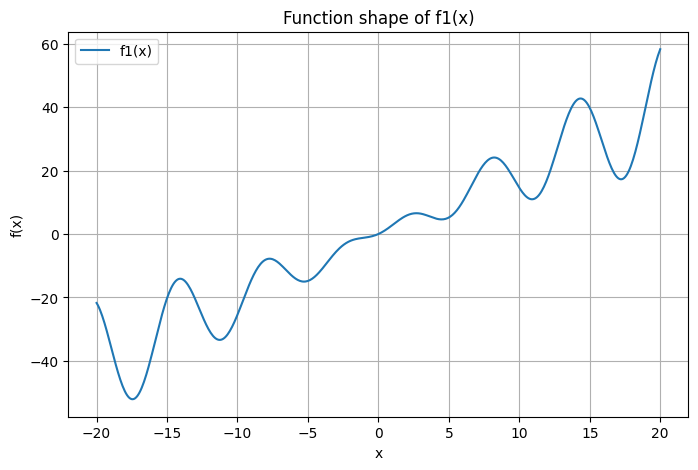

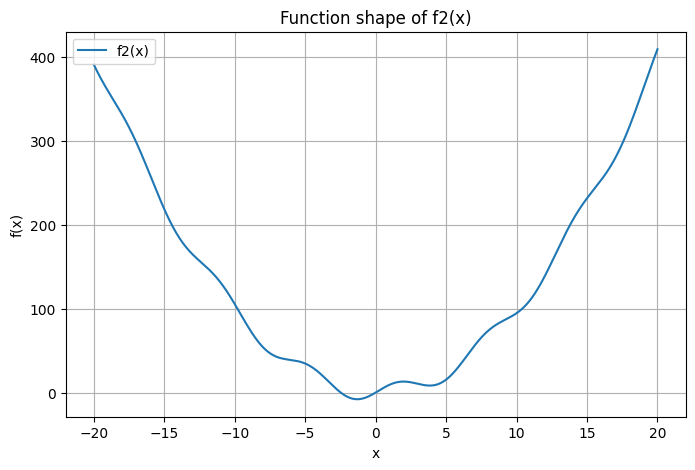

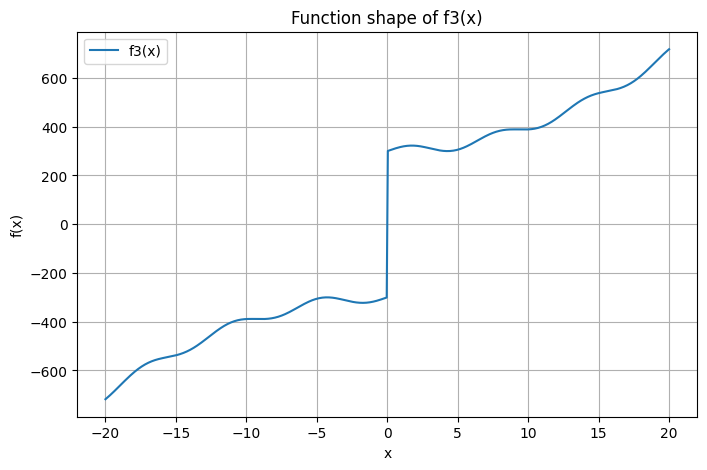

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(f, name):
    x = np.linspace(-20, 20, 500)
    y = f(x)
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, label=f"{name}(x)")
    plt.title(f"Function shape of {name}(x)")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_function(f1, "f1")
plot_function(f2, "f2")
plot_function(f3, "f3")


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

def generate_data_for_regression(f):
  tr = 20
  n_samples = 100
  X = np.linspace(-tr, tr, n_samples)
  y = f(X)

  X_train, X_test, y_train, y_test = train_test_split(
      X, y, train_size=0.7, random_state=42, shuffle=True
  )

  y_test = y_test[X_test.argsort()]
  X_test.sort()

  return X_train.reshape(-1, 1), X_test.reshape(-1, 1), y_train, y_test


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def train_and_plot_models(X_train, X_test, y_train, y_test, title=""):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "SVR": SVR(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "MLP": MLPRegressor(max_iter=3000,early_stopping=True,random_state=42)
    }

    plt.figure(figsize=(10, 6))

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        plt.plot(X_test, y_pred, label=f"{name} (R²={r2:.2f})")

    plt.scatter(X_train, y_train, c='black', s=20, label="Train Data", alpha=0.6)
    plt.title(f"Model Comparison on {title}")
    plt.xlabel("x")
    plt.ylabel("Predicted y")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
def print_model_scores(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "SVR": SVR(),
        "Random Forest": RandomForestRegressor(random_state=42),
        "MLP": MLPRegressor(max_iter=3000,early_stopping=True,random_state=42)
    }

    print("\nModel Performance:")
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        print(f"{name}: R² = {r2:.4f}, MSE = {mse:.2f}")



=== Processing f1(x) ===


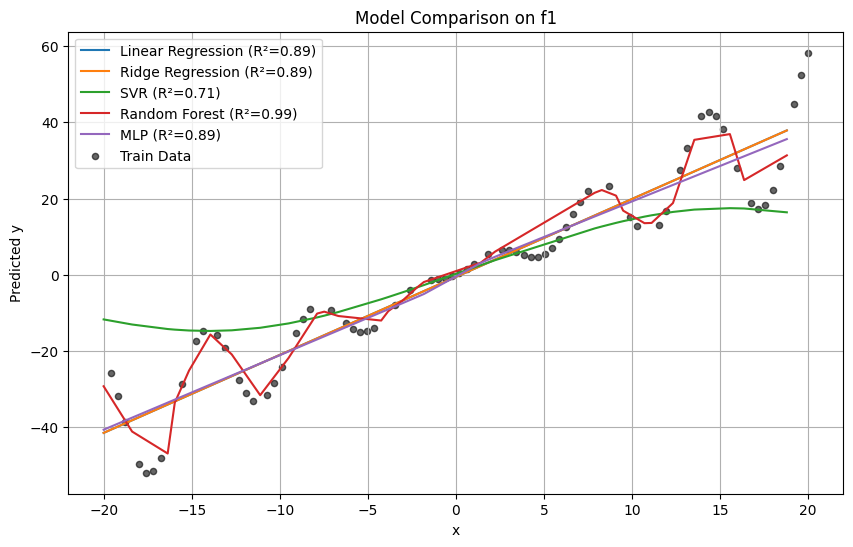


Model Performance:
Linear Regression: R² = 0.8920, MSE = 57.42
Ridge Regression: R² = 0.8920, MSE = 57.41
SVR: R² = 0.7135, MSE = 152.29
Random Forest: R² = 0.9868, MSE = 7.01
MLP: R² = 0.8941, MSE = 56.28

=== Processing f2(x) ===


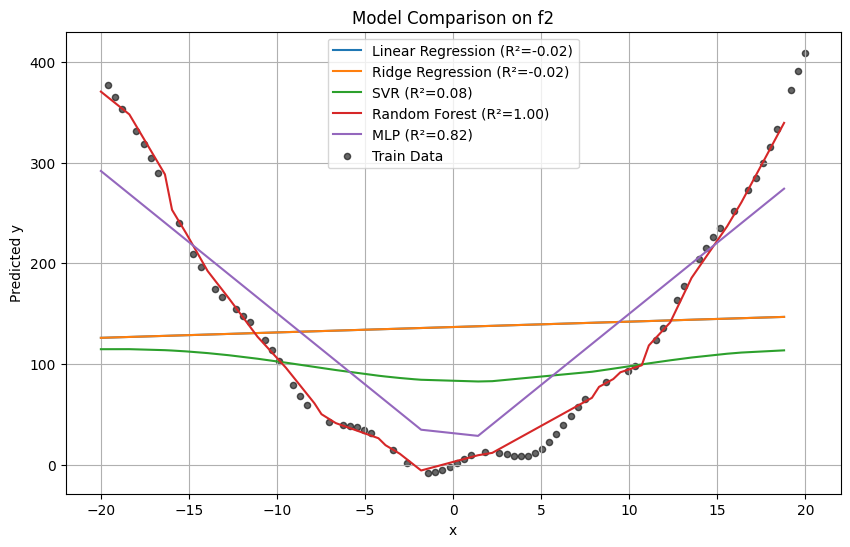


Model Performance:
Linear Regression: R² = -0.0187, MSE = 12926.81
Ridge Regression: R² = -0.0187, MSE = 12926.78
SVR: R² = 0.0780, MSE = 11700.16
Random Forest: R² = 0.9964, MSE = 46.31
MLP: R² = 0.8183, MSE = 2305.12

=== Processing f3(x) ===


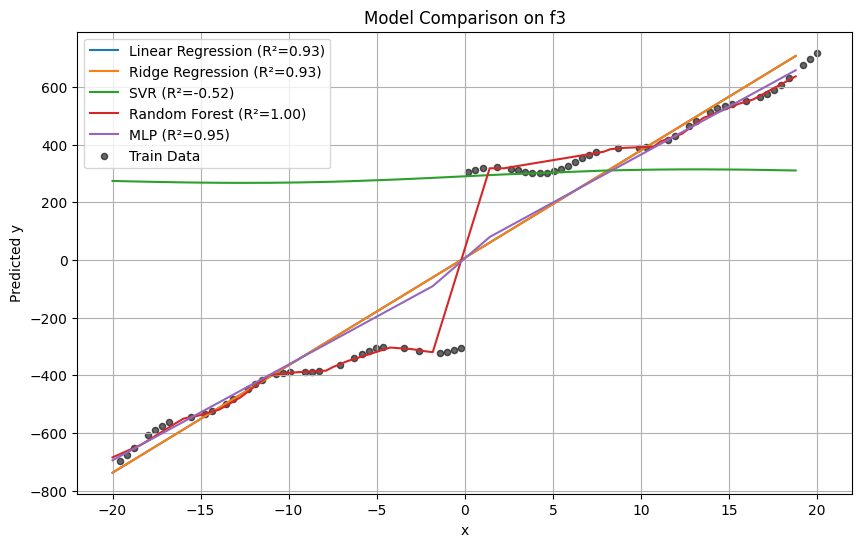


Model Performance:
Linear Regression: R² = 0.9322, MSE = 13568.76
Ridge Regression: R² = 0.9322, MSE = 13569.37
SVR: R² = -0.5208, MSE = 304500.16
Random Forest: R² = 0.9996, MSE = 71.59
MLP: R² = 0.9459, MSE = 10829.29


In [ ]:
functions = [(f1, "f1"), (f2, "f2"), (f3, "f3")]

for f, name in functions:
    print(f"\n=== Processing {name}(x) ===")

    X_train, X_test, y_train, y_test = generate_data_for_regression(f)

    train_and_plot_models(X_train, X_test, y_train, y_test, title=name)

    print_model_scores(X_train, X_test, y_train, y_test)


In [ ]:
def build_feature_candidates(X, function_name):
    if function_name in ["f1", "f2"]:
      return {
          "x": X,
          "x2": X**2,
          "x3": X**3,
          "sinx": np.sin(X),
          "cosx": np.cos(X),
          "x_sinx": X * np.sin(X),
          "absx": np.abs(X)
      }

    elif function_name == "f3":
        return {
            "x": X
        }

In [ ]:
from itertools import combinations
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

def evaluate_feature_combinations(X_train, X_test, y_train, y_test, feature_dict_train, feature_dict_test, function_name):

    if function_name == "f3":
        model = RandomForestRegressor(random_state=42)
        Xtr = feature_dict_train["x"]
        Xtst = feature_dict_test["x"]
        model.fit(Xtr, y_train)
        score = model.score(Xtst, y_test)

        return {
            "features": ("x",),
            "model": "RandomForest",
            "r2": score
        }

    else:
        model = Ridge(alpha=1.0)
        best_score = -float("inf")
        best_combo = None
        best_result = {}

        keys = list(feature_dict_train.keys())
        for r in range(2, min(len(keys) + 1, 5)):
            for combo in combinations(keys, r):
                Xtr = np.concatenate([feature_dict_train[k] for k in combo], axis=1)
                Xtst = np.concatenate([feature_dict_test[k] for k in combo], axis=1)

                model.fit(Xtr, y_train)
                score = model.score(Xtst, y_test)

                if score > best_score:
                    best_score = score
                    best_combo = combo
                    best_result = {
                        "features": combo,
                        "model": "Ridge",
                        "r2": score
                    }

        return best_result


In [ ]:
functions = [(f1, "f1"), (f2, "f2"), (f3, "f3")]

for f, name in functions:
    print(f"\n=== Evaluating features for {name}(x) ===")
    X_train, X_test, y_train, y_test = generate_data_for_regression(f)
    feature_dict_train = build_feature_candidates(X_train, name)
    feature_dict_test = build_feature_candidates(X_test, name)

    result = evaluate_feature_combinations(
      X_train, X_test, y_train, y_test,
      feature_dict_train, feature_dict_test,
      name
    )


    print(f"Best for {name}: features={result['features']}, model={result['model']}, R² = {result['r2']:.4f}")



=== Evaluating features for f1(x) ===
Best for f1: features=('x', 'cosx', 'x_sinx'), model=Ridge, R² = 1.0000

=== Evaluating features for f2(x) ===
Best for f2: features=('x2', 'sinx'), model=Ridge, R² = 1.0000

=== Evaluating features for f3(x) ===
Best for f3: features=('x',), model=RandomForest, R² = 0.9996


####Multivariate regression on synthetic data

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

X, y = make_regression(
    n_samples=2000,
    n_features=20,
    n_informative=10,
    noise=0.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(max_iter=2000, early_stopping=True, random_state=42)
}


print("=== Multivariate Performance ===")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name:<20} | R² = {r2:.4f}, MSE = {mse:.2f}")


=== Multivariate Performance ===
Linear Regression    | R² = 1.0000, MSE = 0.00
Ridge Regression     | R² = 1.0000, MSE = 0.01
SVR                  | R² = 0.1766, MSE = 24508.42
Random Forest        | R² = 0.8351, MSE = 4907.49
MLP Regressor        | R² = 0.9855, MSE = 430.94


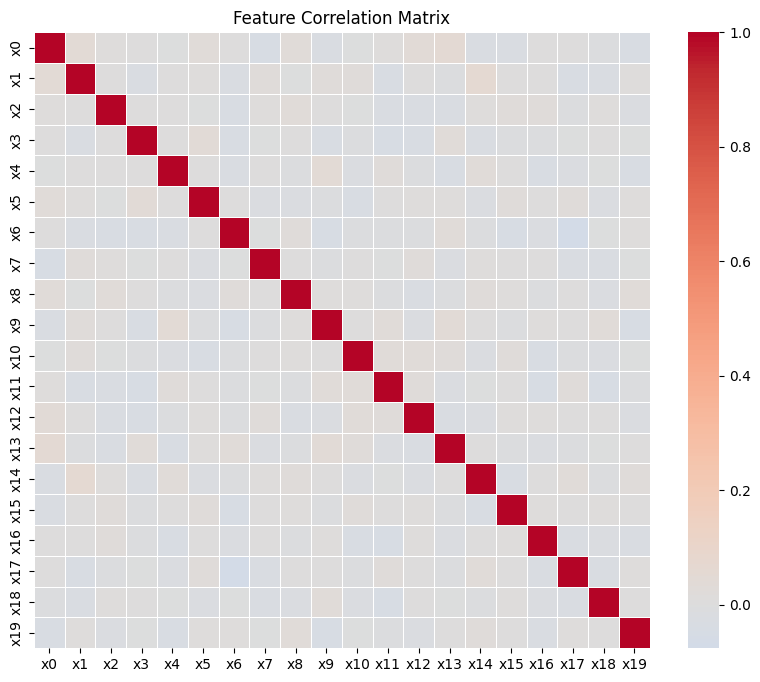

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X_df = pd.DataFrame(X, columns=[f"x{i}" for i in range(X.shape[1])])

plt.figure(figsize=(10, 8))
sns.heatmap(X_df.corr(), cmap="coolwarm", center=0, square=True, linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X, y = make_regression(
    n_samples=2000,
    n_features=20,
    n_informative=10,
    noise=0.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

coefs = pd.Series(model.coef_, name="Coefficient Value")

result_summary = pd.DataFrame({
    "Feature Index": np.arange(X.shape[1]),
    "Coefficient": model.coef_,
})
result_summary["Abs(Coefficient)"] = result_summary["Coefficient"].abs()
result_summary = result_summary.sort_values("Abs(Coefficient)", ascending=False)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print("\nTop 10 Most Influential Features (by absolute coefficient):")
print(result_summary.head(10))


R² Score: 1.0000
MSE: 0.00

Top 10 Most Influential Features (by absolute coefficient):
    Feature Index  Coefficient  Abs(Coefficient)
7               7    93.777726         93.777726
15             15    83.172921         83.172921
12             12    70.536980         70.536980
11             11    58.294499         58.294499
3               3    46.401843         46.401843
5               5    35.509976         35.509976
10             10    34.543443         34.543443
18             18    27.408945         27.408945
17             17     5.060258          5.060258
14             14     4.997079          4.997079


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X, y = make_regression(
    n_samples=2000,
    n_features=20,
    n_informative=5,
    noise=30.0,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

coefs = pd.Series(model.coef_, name="Coefficient Value")

result_summary = pd.DataFrame({
    "Feature Index": np.arange(X.shape[1]),
    "Coefficient": model.coef_,
})
result_summary["Abs(Coefficient)"] = result_summary["Coefficient"].abs()
result_summary = result_summary.sort_values("Abs(Coefficient)", ascending=False)

print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print("\nTop 10 Most Influential Features (by absolute coefficient):")
print(result_summary.head(10))


R² Score: 0.9413
MSE: 1010.67

Top 10 Most Influential Features (by absolute coefficient):
    Feature Index  Coefficient  Abs(Coefficient)
15             15    83.035525         83.035525
13             13    69.089505         69.089505
14             14    46.528044         46.528044
12             12    33.422283         33.422283
4               4     5.067001          5.067001
6               6    -1.443203          1.443203
5               5    -1.238371          1.238371
3               3    -1.100168          1.100168
0               0    -0.814058          0.814058
7               7     0.610119          0.610119


####Temperature series forecasting

In [2]:
import pandas as pd

file_path = "/content/SummaryofWeather.csv"
weather_df = pd.read_csv(file_path)

print("=== Data Sample ===")
print(weather_df.head())

print("\n=== Data Info ===")
print(weather_df.info())

print("\n=== Missing Value Count (Top 10 Columns) ===")
print(weather_df.isnull().sum().sort_values(ascending=False).head(10))

print("\n=== Shape of Dataset ===")
print(f"Rows: {weather_df.shape[0]}, Columns: {weather_df.shape[1]}")


<ipython-input-2-46164e4726d4>:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_df = pd.read_csv(file_path)


=== Data Sample ===
     STA      Date Precip  WindGustSpd    MaxTemp    MinTemp   MeanTemp  \
0  10001  1942-7-1  1.016          NaN  25.555556  22.222222  23.888889   
1  10001  1942-7-2      0          NaN  28.888889  21.666667  25.555556   
2  10001  1942-7-3   2.54          NaN  26.111111  22.222222  24.444444   
3  10001  1942-7-4   2.54          NaN  26.666667  22.222222  24.444444   
4  10001  1942-7-5      0          NaN  26.666667  21.666667  24.444444   

  Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  SD3  RHX  RHN  \
0      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
1      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
2      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
3      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   
4      0.0         NaN  42  ... NaN  NaN NaN  NaN         NaN  NaN  NaN  NaN   

  RVG  WTE  
0 NaN  NaN  
1 NaN  NaN  
2 NaN  Na

In [3]:
from sklearn.preprocessing import StandardScaler

weather_df["MeanTemp"] = weather_df.groupby("STA")["MeanTemp"].transform(lambda g: g.fillna(g.mean()))

weather_df["Date"] = pd.to_datetime(weather_df["Date"], errors="coerce")
weather_df["Month"] = weather_df["Date"].dt.month
weather_df["Year"] = weather_df["Date"].dt.year
weather_df["Season"] = weather_df["Month"] % 12 // 3 + 1

weather_df["Temp_MA7"] = weather_df.groupby("STA")["MeanTemp"].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
scaler = StandardScaler()

features_to_scale = ["MeanTemp", "Temp_MA7", "Month", "Season"]

weather_df[features_to_scale] = scaler.fit_transform(weather_df[features_to_scale])

print(weather_df[["STA", "Date", "MeanTemp", "Temp_MA7", "Month", "Season"]].head(10))



     STA       Date  MeanTemp  Temp_MA7     Month    Season
0  10001 1942-07-01  0.178027  0.181492  0.079982  0.411664
1  10001 1942-07-02  0.378880  0.283703  0.079982  0.411664
2  10001 1942-07-03  0.244978  0.272346  0.079982  0.411664
3  10001 1942-07-04  0.244978  0.266668  0.079982  0.411664
4  10001 1942-07-05  0.244978  0.263261  0.079982  0.411664
5  10001 1942-07-06  0.244978  0.260989  0.079982  0.411664
6  10001 1942-07-07  0.378880  0.278836  0.079982  0.411664
7  10001 1942-07-08  0.244978  0.288570  0.079982  0.411664
8  10001 1942-07-09  0.311929  0.278836  0.079982  0.411664
9  10001 1942-07-10  0.111076  0.259367  0.079982  0.411664


In [4]:
mean_temp_counts = weather_df.groupby("STA")["MeanTemp"].count().sort_values(ascending=False)

top_10_stations = mean_temp_counts.head(10).index.tolist()


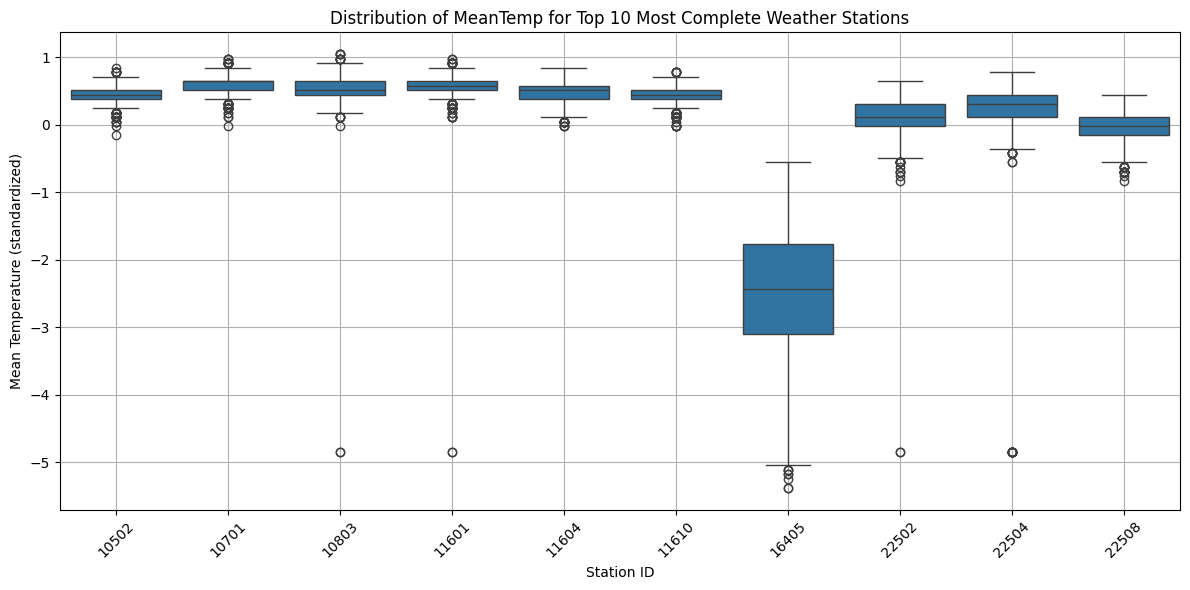

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

top_10_df = weather_df[weather_df["STA"].isin(top_10_stations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x="STA", y="MeanTemp", data=top_10_df)
plt.title("Distribution of MeanTemp for Top 10 Most Complete Weather Stations")
plt.xlabel("Station ID")
plt.ylabel("Mean Temperature (standardized)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


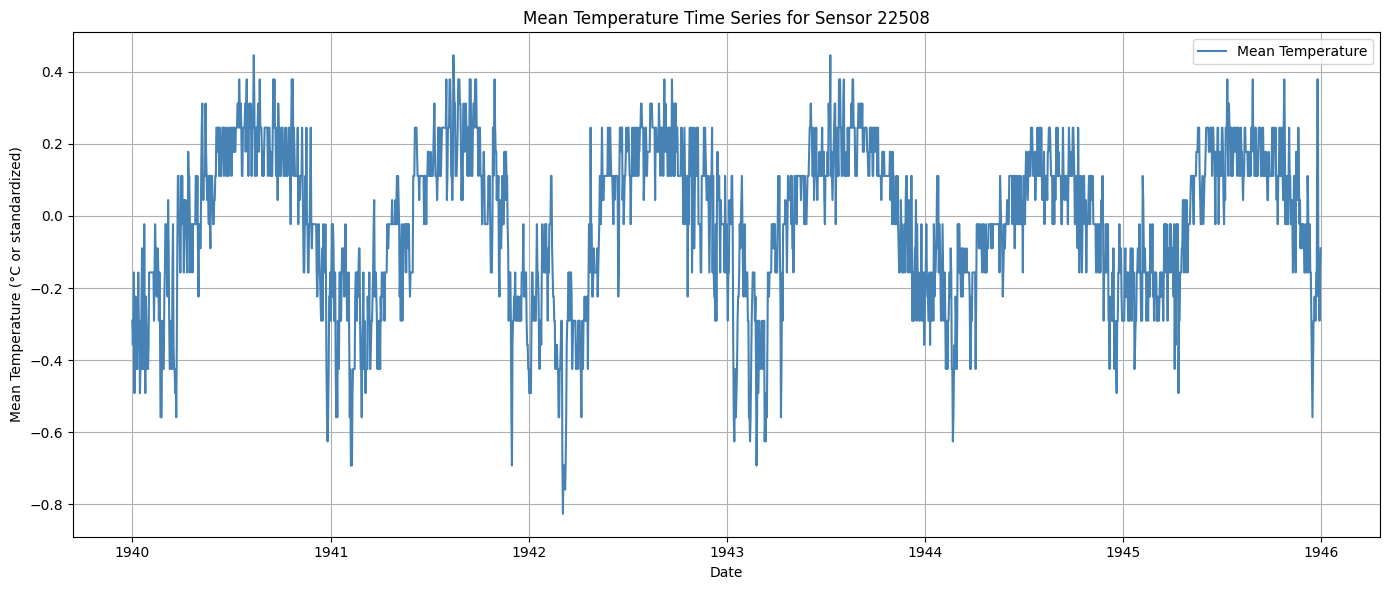

In [6]:
import matplotlib.pyplot as plt

sensor_df = weather_df[weather_df["STA"] == 22508].copy()

sensor_df = sensor_df.sort_values("Date")

plt.figure(figsize=(14, 6))
plt.plot(sensor_df["Date"], sensor_df["MeanTemp"], label="Mean Temperature", color="steelblue")
plt.title("Mean Temperature Time Series for Sensor 22508")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C or standardized)")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


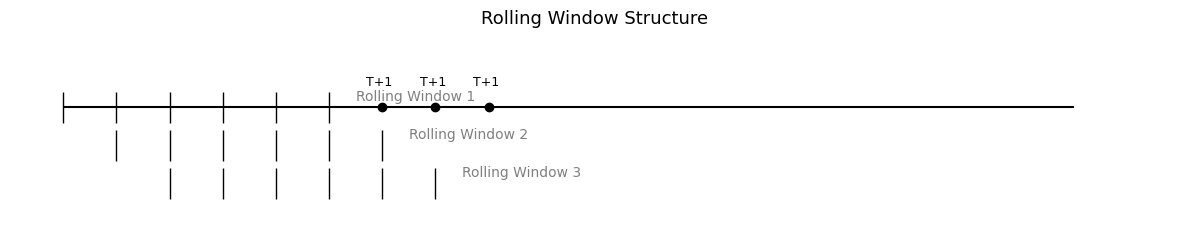

In [7]:
import matplotlib.pyplot as plt

T = 20
W = 5
num_windows = 3

plt.figure(figsize=(12, 2.5))
plt.hlines(y=1, xmin=1, xmax=T, color='black', linewidth=1.5)


for i in range(num_windows):
    start = 1 + i
    end = start + W
    for t in range(start, end + 1):
        plt.vlines(x=t, ymin=0.9 - i*0.25, ymax=1.1 - i*0.25, color='black', linewidth=1)

    plt.text(start + W + 0.5, 1.05 - i*0.25, f"Rolling Window {i+1}", fontsize=10, color='gray')

for i in range(num_windows):
    pred_time = 1 + i + W + 1
    if pred_time <= T:
        plt.plot(pred_time, 1, 'ko')
        plt.text(pred_time - 0.3, 1.15, "T+1", fontsize=9, color='black')

plt.ylim(0.2, 1.5)
plt.xlim(0, T + 2)
plt.title("Rolling Window Structure", fontsize=13)
plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
import numpy as np

sensor_df = weather_df[weather_df["STA"] == 22508].copy()
sensor_df = sensor_df.sort_values("Date")

temperature_series = sensor_df["MeanTemp"].values
dates = sensor_df["Date"].values

W = 7

X = []
y = []
target_dates = []

for t in range(len(temperature_series) - W - 1):
    X.append(temperature_series[t : t + W])
    y.append(temperature_series[t + W + 1])
    target_dates.append(dates[t + W + 1])

X = np.array(X)
y = np.array(y)

columns = [f"T-{W-i}" for i in range(W)]
rolling_df = pd.DataFrame(X, columns=columns)
rolling_df["Target"] = y
rolling_df["Target_Date"] = target_dates


rolling_df.head()


,T-7,T-6,T-5,T-4,T-3,T-2,T-1,Target,Target_Date
0,-0.290630,-0.357581,-0.290630,-0.156728,-0.491483,-0.290630,-0.223679,-0.357581,1940-01-09
1,-0.357581,-0.290630,-0.156728,-0.491483,-0.290630,-0.223679,-0.424532,-0.424532,1940-01-10
2,-0.290630,-0.156728,-0.491483,-0.290630,-0.223679,-0.424532,-0.357581,-0.290630,1940-01-11
3,-0.156728,-0.491483,-0.290630,-0.223679,-0.424532,-0.357581,-0.424532,-0.156728,1940-01-12
4,-0.491483,-0.290630,-0.223679,-0.424532,-0.357581,-0.424532,-0.290630,-0.290630,1940-01-13


In [9]:
train_df = rolling_df[rolling_df["Target_Date"].dt.year <= 1944]
test_df  = rolling_df[rolling_df["Target_Date"].dt.year == 1945]

X_train = train_df.drop(columns=["Target", "Target_Date"]).values
y_train = train_df["Target"].values

X_test = test_df.drop(columns=["Target", "Target_Date"]).values
y_test = test_df["Target"].values

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")


Train size: (1819, 7), Test size: (365, 7)


                       Model  R² Score       MSE
0              MLP Regressor  0.615088  0.013155
1           Ridge Regression  0.611035  0.013294
2          Linear Regression  0.609151  0.013358
3  Support Vector Regression  0.590942  0.013981
4              Random Forest  0.547760  0.015457


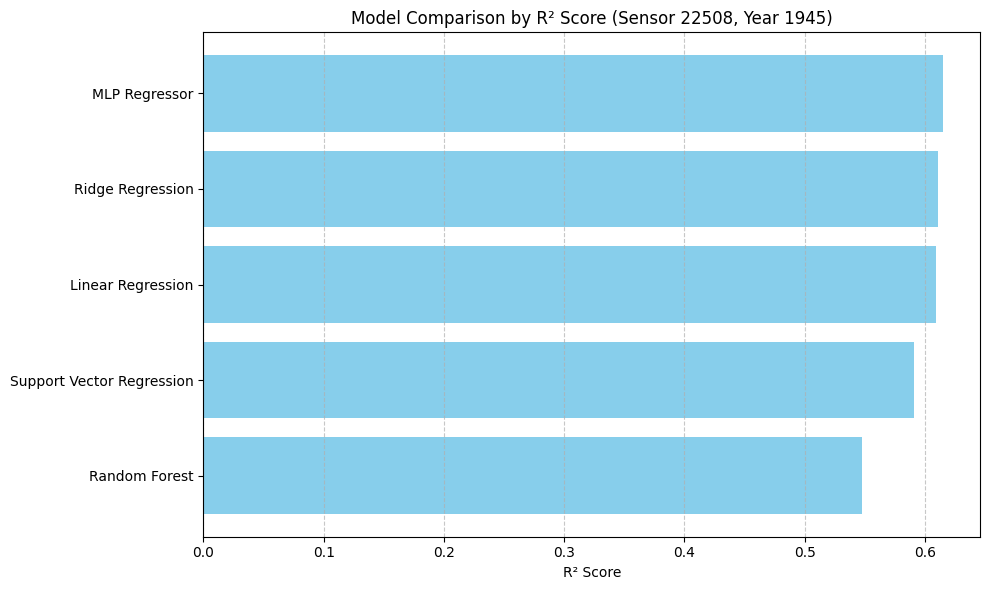

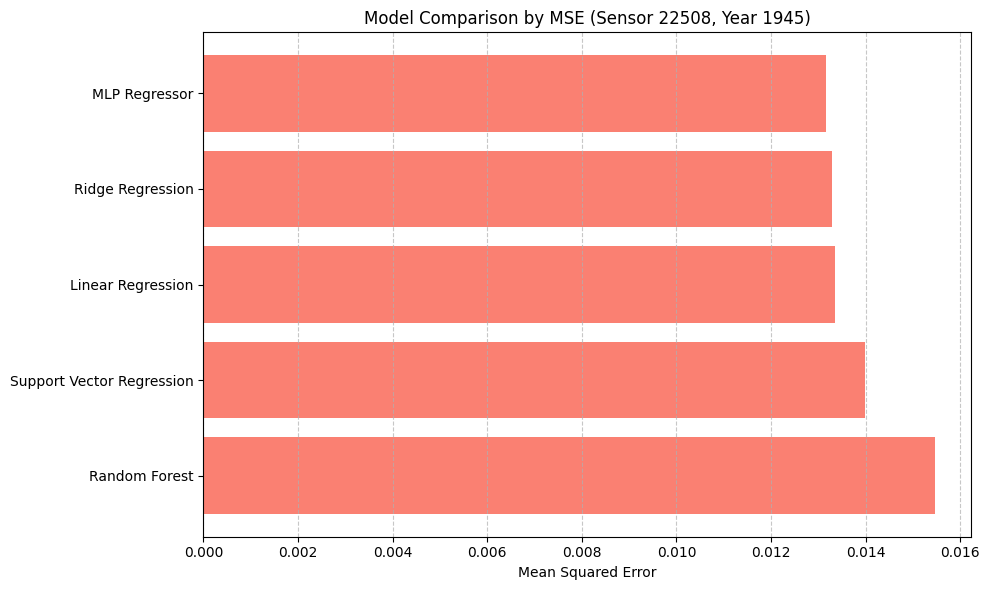

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Regression": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append({
        "Model": name,
        "R² Score": r2,
        "MSE": mse
    })

results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False).reset_index(drop=True)
print(results_df)

plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["R² Score"], color="skyblue")
plt.xlabel("R² Score")
plt.title("Model Comparison by R² Score (Sensor 22508, Year 1945)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.barh(results_df["Model"], results_df["MSE"], color="salmon")
plt.xlabel("Mean Squared Error")
plt.title("Model Comparison by MSE (Sensor 22508, Year 1945)")
plt.gca().invert_yaxis()
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Manual Ridge α=1.0 → R² Score: 0.6120, MSE: 0.0133


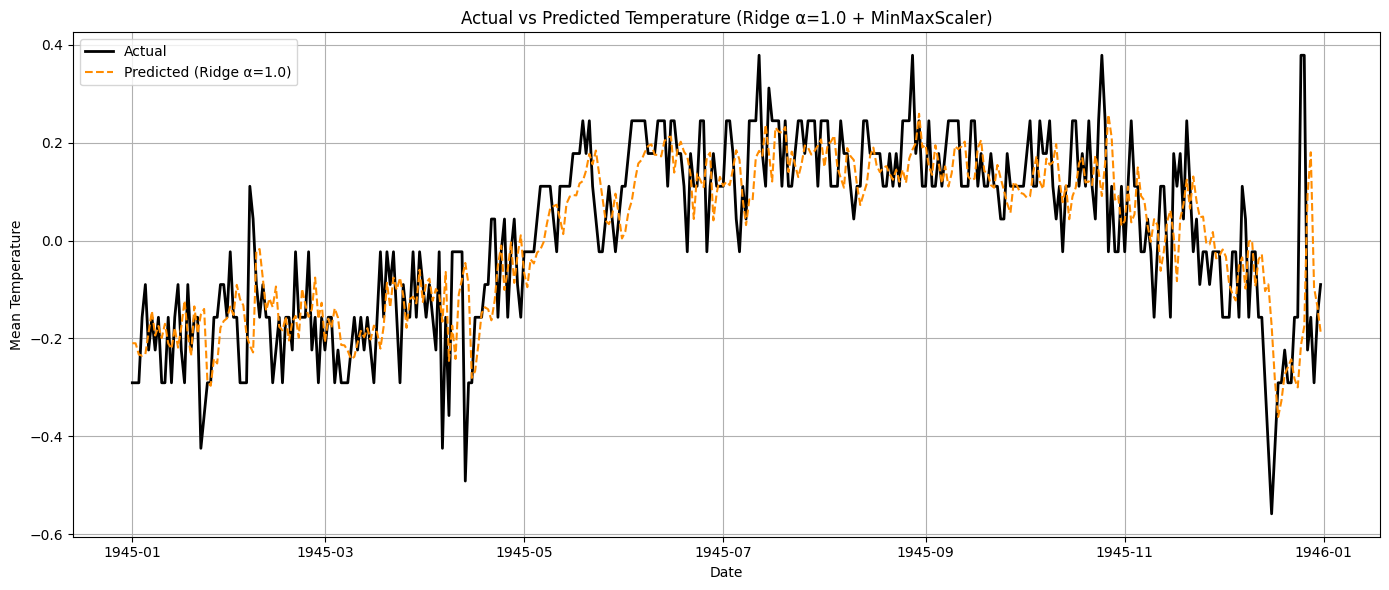

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

scaled_df = rolling_df.copy()
feature_cols = [col for col in scaled_df.columns if col.startswith("T-")]
scaler = MinMaxScaler()
scaled_df[feature_cols] = scaler.fit_transform(scaled_df[feature_cols])

train_df = scaled_df[scaled_df["Target_Date"].dt.year <= 1944]
test_df = scaled_df[scaled_df["Target_Date"].dt.year == 1945]

X_train = train_df[feature_cols].values
y_train = train_df["Target"].values
X_test = test_df[feature_cols].values
y_test = test_df["Target"].values

alpha_value = 1.0
ridge = Ridge(alpha=alpha_value)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Manual Ridge α={alpha_value} → R² Score: {r2:.4f}, MSE: {mse:.4f}")

plt.figure(figsize=(14, 6))
plt.plot(test_df["Target_Date"].values, y_test, label="Actual", color="black", linewidth=2)
plt.plot(test_df["Target_Date"].values, y_pred, label=f"Predicted (Ridge α={alpha_value})", color="darkorange", linestyle="--")
plt.title(f"Actual vs Predicted Temperature (Ridge α={alpha_value} + MinMaxScaler)")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
